# Exercício 8 - Perceptrons e MLP

### Importando as bibliotecas necessárias

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_dataset = load_iris()

### Separando dados de entrada e target

In [3]:
attributes = iris_dataset.data
target = iris_dataset.target
labels = iris_dataset.target_names
features = iris_dataset.feature_names

### Filtrando features e dados somente para Setosa e Versicolour 

Serão utilizados somente os valores de Sepal Length e Sepal Width na classificação, para que seja possível plotar a saída do Perceptron sem utilizar processos de redução de dimensões.

In [4]:
filtered_iris = attributes[:100, :2]
filtered_target = target[:100]

### Separando 70% dos dados para treino e 30% para teste

In [5]:
features_train, features_test, target_train, target_test = train_test_split(filtered_iris, 
                                                                            filtered_target, 
                                                                            train_size=0.7, 
                                                                            test_size=0.3)

### Testando o Perceptron para as duas classes

In [6]:
p1 = Perceptron()
p1.fit(features_train, target_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

### Resultado da Classificação

In [7]:
p1.score(features_test, target_test)

0.9666666666666667

### Reta produzida pelo Perceptron

In [8]:
def plot_data(inputs,targets,weights, classes):
    plt.figure(figsize=(15,10))

    colors = ['red', 'green', 'blue']  # Vetor de cores para as classes
    for color, i, label in zip(colors, range(classes), labels): # Imprime as classes em função dos features
        plt.scatter(inputs[targets == i, 0], inputs[targets == i, 1], color=color, alpha=1, lw=5, label=label)

    a = -(weights[0]/weights[2])/(weights[0]/weights[1])  
    b = -weights[0]/weights[2]
    
    x1 = np.amin(inputs[:,:1])
    y1 = (a*x1) + b
    
    x2 = np.amax(inputs[:,:1])
    y2 = (a*x2) + b
    
    x = [x1,x2]
    y = [y1,y2]
    
    plt.plot(x,y, 'k-')
    plt.rcParams.update({'font.size': 14})
    plt.legend(loc='best', scatterpoints=1)
    plt.title('Perceptron - Iris Dataset')
    plt.xlabel('Sepal Length', fontsize=12)
    plt.ylabel('Sepal Width', fontsize=12)
    plt.show()

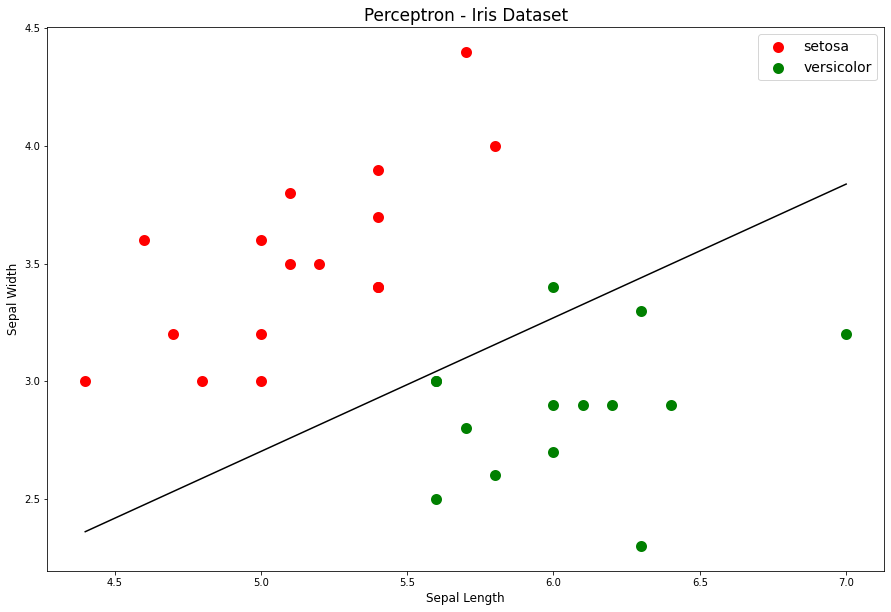

In [9]:
plot_data(features_test, target_test,list([p1.intercept_, *p1.coef_[0]]), 2)

### Testando a classificação com as 3 espécies

In [10]:
filtered_iris = attributes[:,:2]
filtered_target = target

features_train, features_test, target_train, target_test = train_test_split(filtered_iris, 
                                                                            filtered_target, 
                                                                            train_size=0.7, 
                                                                            test_size=0.3)

p2 = Perceptron()
p2.fit(features_train, target_train)
p2.score(features_test, target_test)

0.4666666666666667

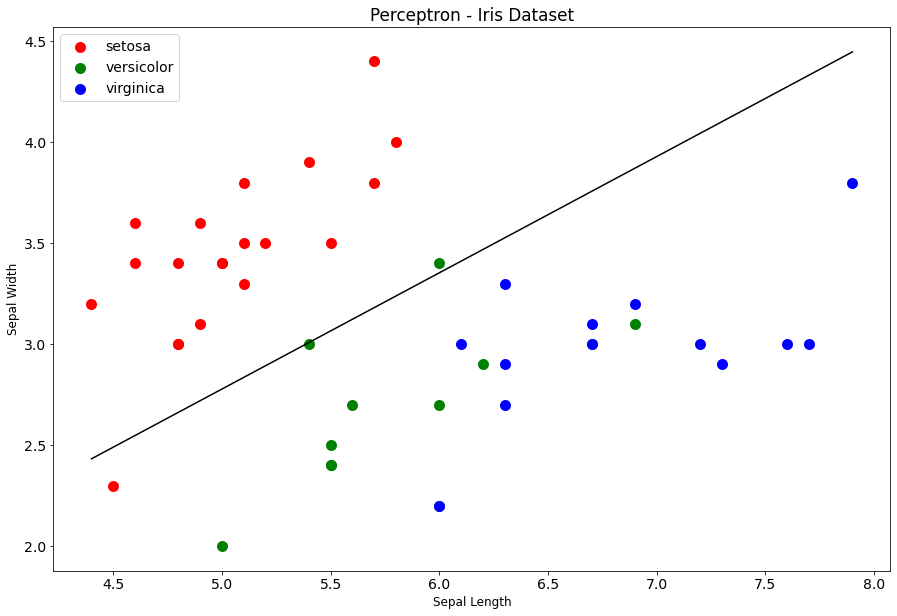

In [11]:
plot_data(features_test, target_test, [p2.intercept_[0], *p2.coef_[0]],3)

## Multilayer Perceptron (MLP)

### Separando dados para treino e teste (70% para treino e 30% para teste)

In [36]:
train_attributes, test_attributes, train_target, test_target = train_test_split(attributes, 
                                                                                target, 
                                                                                train_size=0.7, 
                                                                                test_size=0.3)

### Treinando o modelo

In [39]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(train_attributes, train_target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Precisão do modelo

Precisão para a classificação dos dados de teste

In [40]:
mlp.score(test_attributes, test_target)

0.9777777777777777